In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("all_table_data.csv")
data=df.copy()

In [4]:
df.describe

<bound method NDFrame.describe of      S.NO Parliament Constituency  \
0       1           Anakapalle(5)   
1       2          Rajahmundry(8)   
2       3           Narsapuram(9)   
3       4       Arunachal West(1)   
4       5       Arunachal East(2)   
..    ...                     ...   
538   539        Khadoor Sahib(3)   
539   540             Faridkot(9)   
540   541         Daman & Diu (1)   
541   542            BARAMULLA(1)   
542   543               Ladakh(1)   

                               Winning Candidate Total Votes  Margin Party  
0                                     C.M.RAMESH      762069  296530   BJP  
1                       DAGGUBATI PURANDHESHWARI      726515  239139   BJP  
2    BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA)      707343  276802   BJP  
3                                   KIREN RIJIJU      205417  100738   BJP  
4                                      TAPIR GAO      145581   30421   BJP  
..                                           ...         ..

In [5]:
df.head()

,S.NO,Parliament Constituency,Winning Candidate,Total Votes,Margin,Party
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,BJP
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,BJP
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,BJP
3,4,Arunachal West(1),KIREN RIJIJU,205417,100738,BJP
4,5,Arunachal East(2),TAPIR GAO,145581,30421,BJP


In [6]:
df.tail()

,S.NO,Parliament Constituency,Winning Candidate,Total Votes,Margin,Party
538,539,Khadoor Sahib(3),AMRITPAL SINGH,404430,197120,IND
539,540,Faridkot(9),SARABJEET SINGH KHALSA,298062,70053,IND
540,541,Daman & Diu (1),PATEL UMESHBHAI BABUBHAI,42523,6225,IND
541,542,BARAMULLA(1),ABDUL RASHID SHEIKH,472481,204142,IND
542,543,Ladakh(1),MOHMAD HANEEFA,65259,27862,IND


In [7]:
df

,S.NO,Parliament Constituency,Winning Candidate,Total Votes,Margin,Party
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,BJP
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,BJP
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,BJP
3,4,Arunachal West(1),KIREN RIJIJU,205417,100738,BJP
4,5,Arunachal East(2),TAPIR GAO,145581,30421,BJP
...,...,...,...,...,...,...
538,539,Khadoor Sahib(3),AMRITPAL SINGH,404430,197120,IND
539,540,Faridkot(9),SARABJEET SINGH KHALSA,298062,70053,IND
540,541,Daman & Diu (1),PATEL UMESHBHAI BABUBHAI,42523,6225,IND
541,542,BARAMULLA(1),ABDUL RASHID SHEIKH,472481,204142,IND


In [8]:
df.describe()

,S.NO
count,543.000000
mean,272.000000
std,156.894869
min,1.000000
25%,136.500000
50%,272.000000
75%,407.500000
max,543.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   S.NO                     543 non-null    int64 
 1   Parliament Constituency  543 non-null    object
 2   Winning Candidate        543 non-null    object
 3   Total Votes              543 non-null    object
 4   Margin                   543 non-null    object
 5   Party                    543 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.6+ KB


In [20]:
non_numeric_total_votes = df[~df['Total Votes'].str.isnumeric()]['Total Votes']
non_numeric_margin = df[~df['Margin'].str.isnumeric()]['Margin']
print("Non-numeric Total Votes:", non_numeric_total_votes)
print("Non-numeric Margin:", non_numeric_margin)

Non-numeric Total Votes: Series([], Name: Total Votes, dtype: object)
Non-numeric Margin: Series([], Name: Margin, dtype: object)


In [14]:
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

In [15]:
df['Total Votes'] = df['Total Votes'].fillna(0)  # Replace NaN with 0
df['Margin'] = df['Margin'].fillna(0)  # Replace NaN with 0

In [16]:
df['Total Votes'] = df['Total Votes'].astype(int)
df['Margin'] = df['Margin'].astype(int)

In [17]:
df.describe()

,S.NO,Total Votes,Margin
count,543.000000,5.430000e+02,5.430000e+02
mean,272.000000,6.011045e+05,1.620511e+05
std,156.894869,1.684989e+05,1.472917e+05
min,1.000000,0.000000e+00,0.000000e+00
25%,136.500000,4.990795e+05,5.860700e+04
50%,272.000000,5.860440e+05,1.214940e+05
75%,407.500000,7.156405e+05,2.227650e+05
max,543.000000,1.471885e+06,1.175092e+06


In [23]:
non_numeric_total_votes = data[~data['Total Votes'].apply(lambda x: str(x).isdigit())]
print("Rows with non-numeric values in 'Total Votes':")
print(non_numeric_total_votes['Winning Candidate'])

Rows with non-numeric values in 'Total Votes':
49    MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested)
Name: Winning Candidate, dtype: object


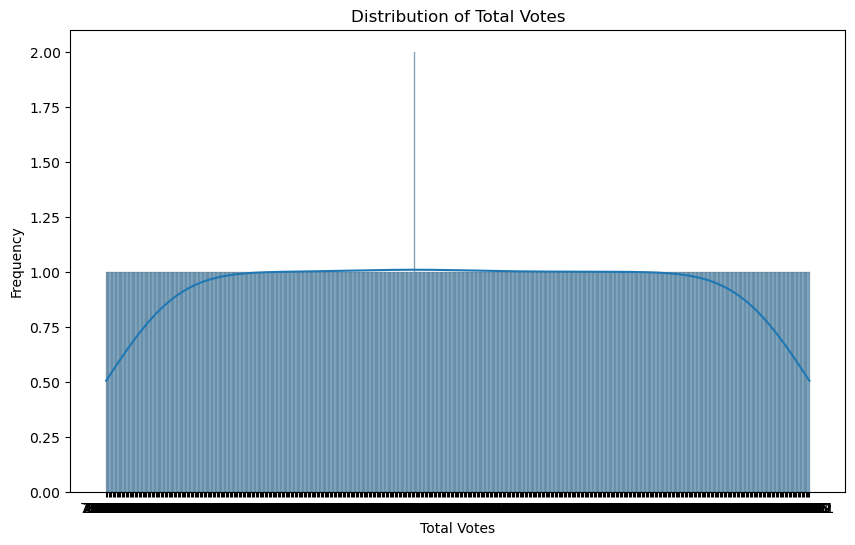

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'], bins=20, kde=True)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

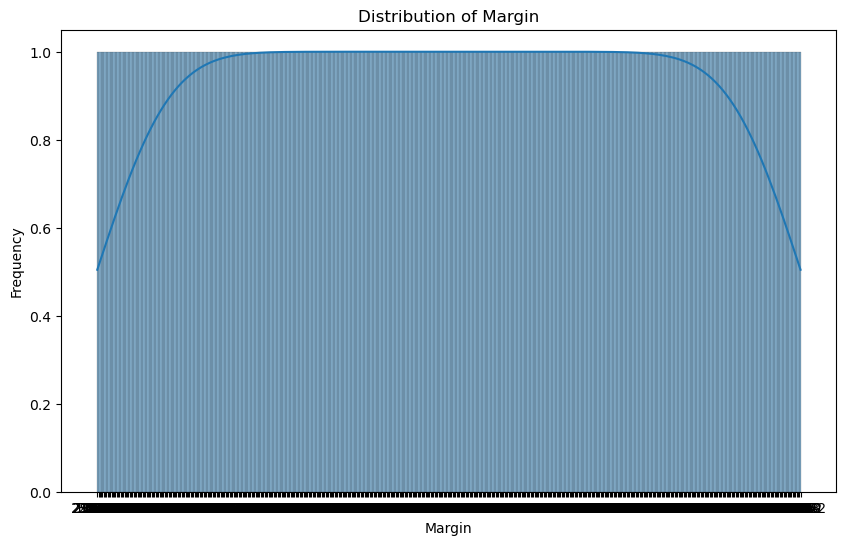

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=20, kde=True)
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

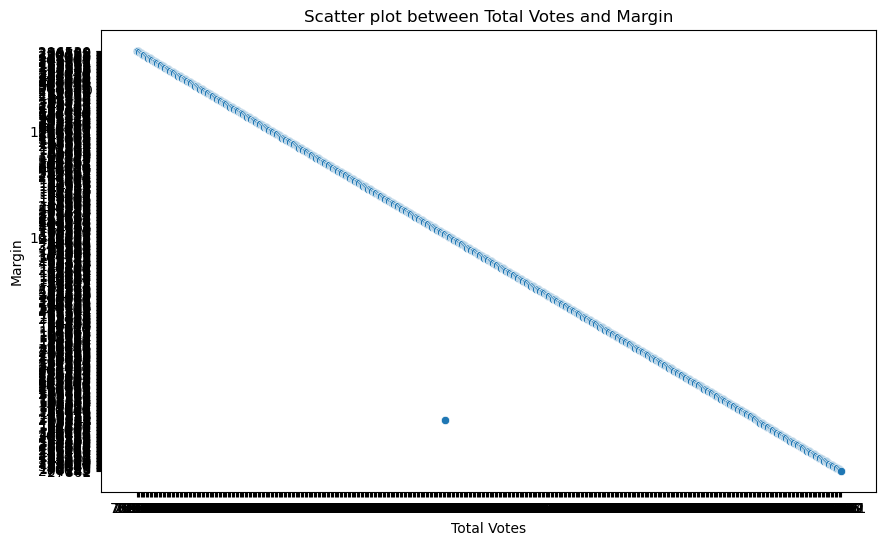

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=df)
plt.title('Scatter plot between Total Votes and Margin')
plt.xlabel('Total Votes')
plt.ylabel('Margin')
plt.show()

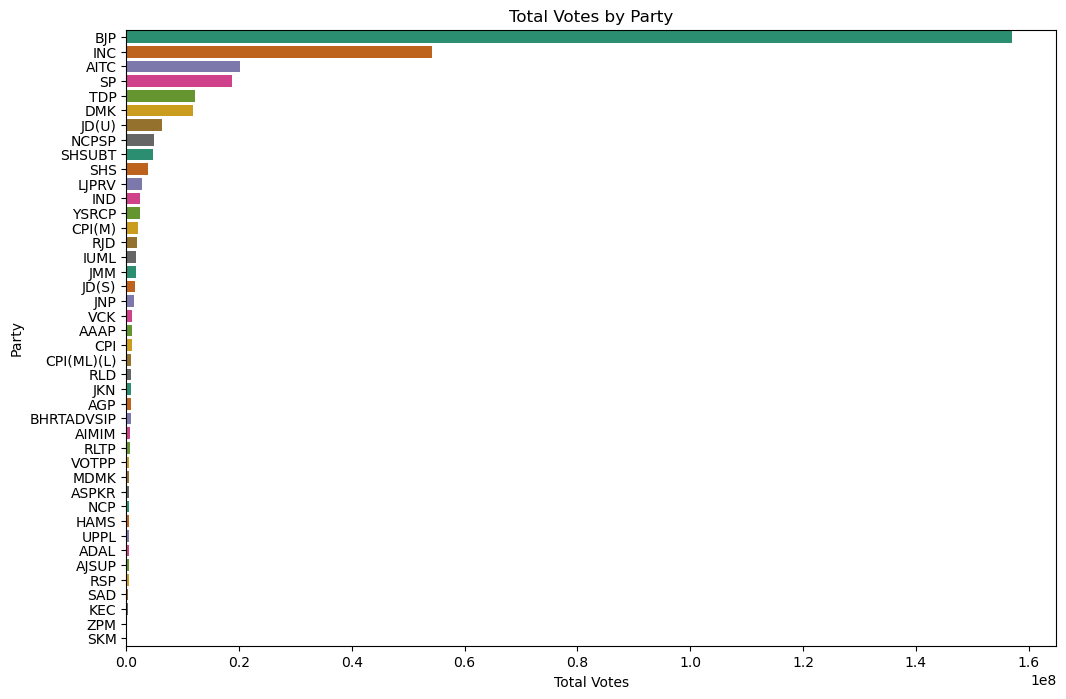

In [34]:
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
df['Total Votes'] = df['Total Votes'].fillna(0)
party_votes = df.groupby('Party')['Total Votes'].sum().reset_index()
party_votes = party_votes.sort_values(by='Total Votes', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Votes', y='Party', data=party_votes, palette='Dark2')
plt.title('Total Votes by Party')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.show()

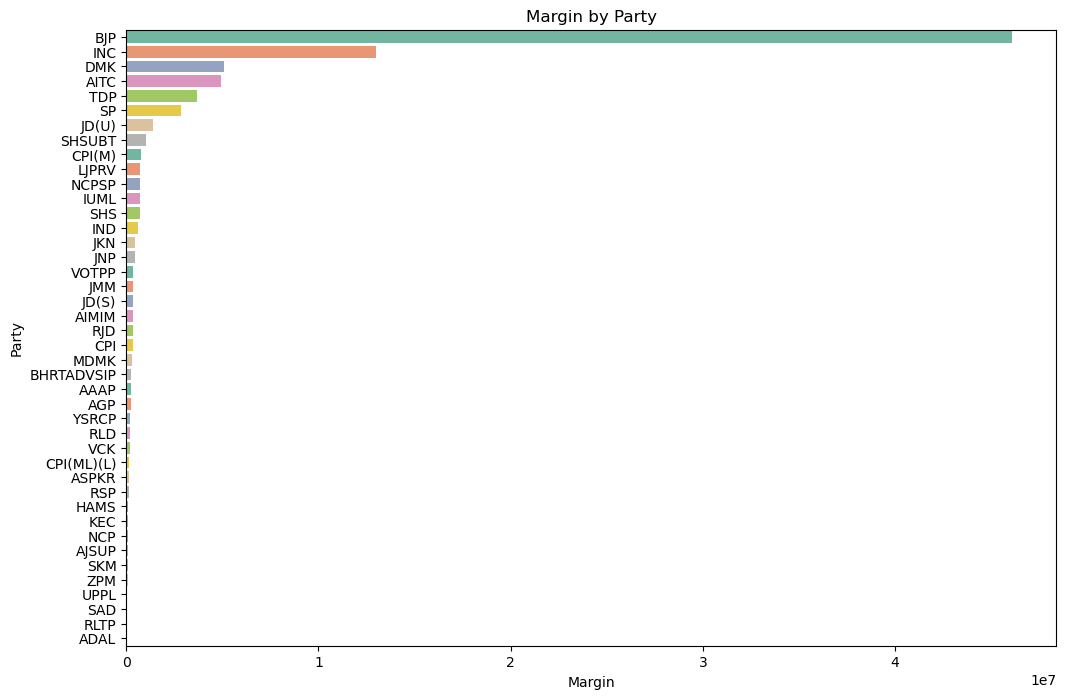

In [33]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
df['Margin'] = df['Margin'].fillna(0)
party_margin = df.groupby('Party')['Margin'].sum().reset_index()
party_margin = party_margin.sort_values(by='Margin', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Party', data=party_margin, palette='Set2')
plt.title('Margin by Party')
plt.xlabel('Margin')
plt.ylabel('Party')
plt.show()

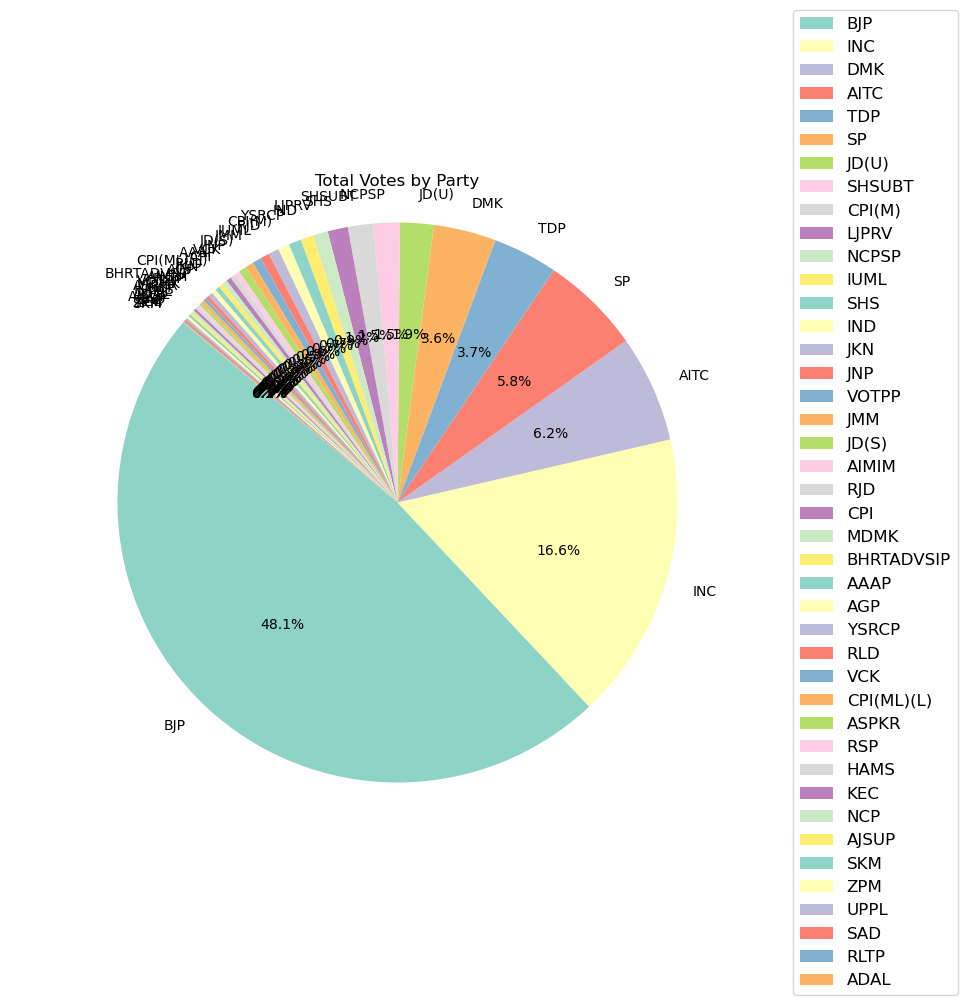

In [38]:
plt.figure(figsize=(10, 8))
plt.pie(party_votes['Total Votes'], labels=party_votes['Party'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Total Votes by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(party_margin['Party'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

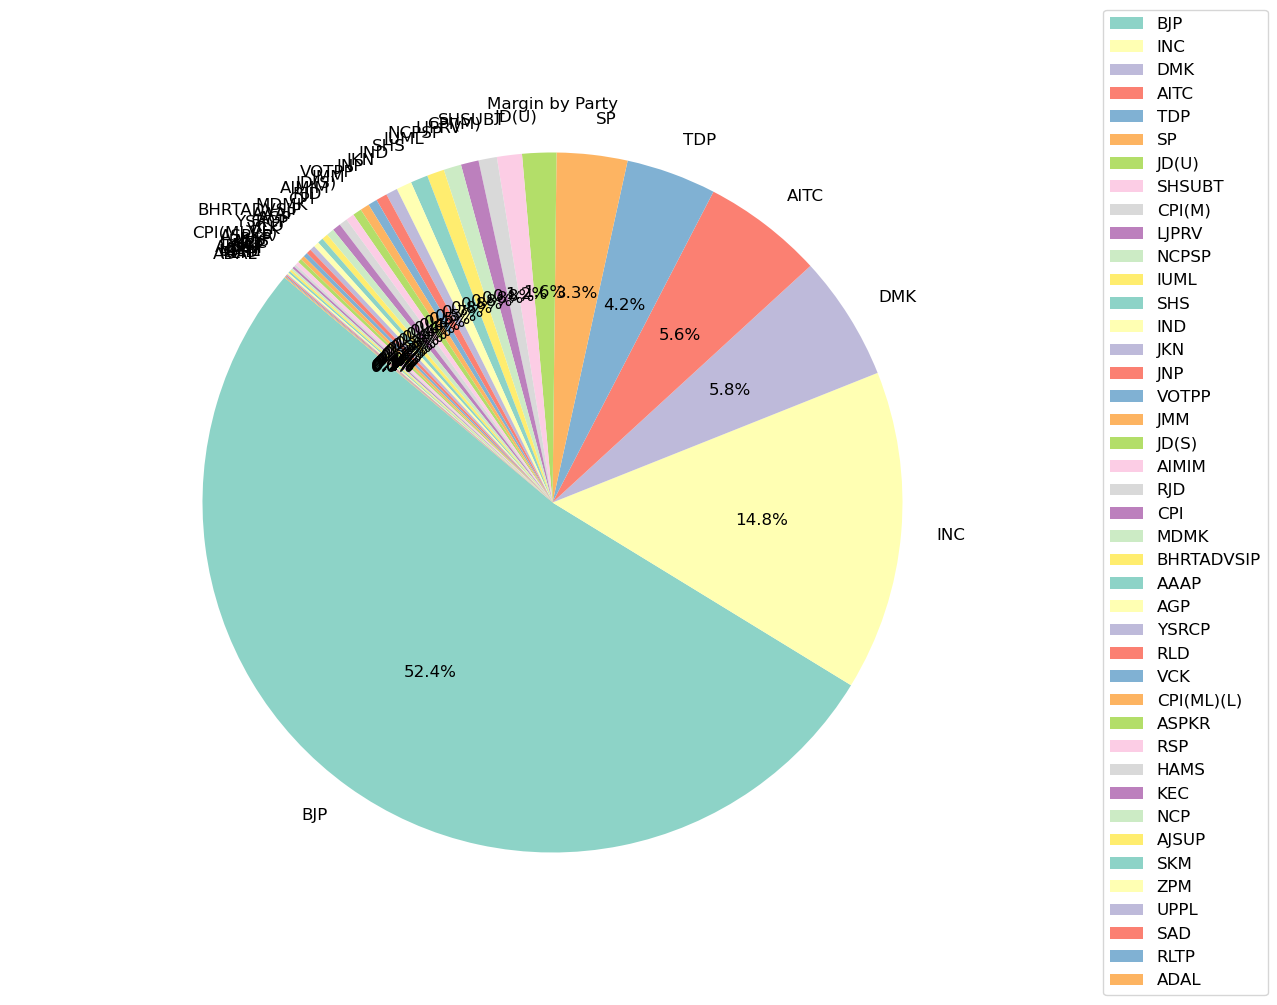

In [37]:
plt.figure(figsize=(14, 10))
plt.pie(party_margin['Margin'], labels=party_margin['Party'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors, textprops={'fontsize': 12})
plt.title('Margin by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend outside the pie chart
plt.legend(party_margin['Party'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

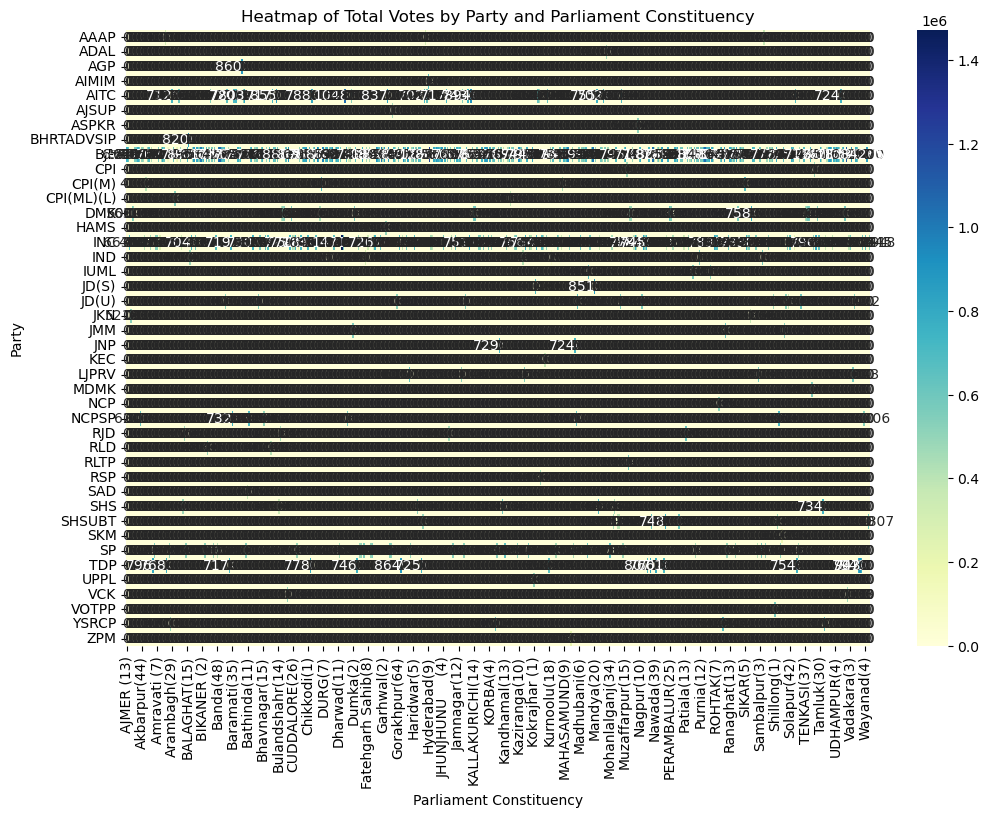

In [41]:
pivot_table = df.pivot_table(values='Total Votes', index='Party', columns='Parliament Constituency', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Total Votes by Party and Parliament Constituency')
plt.xlabel('Parliament Constituency')
plt.ylabel('Party')
plt.show()

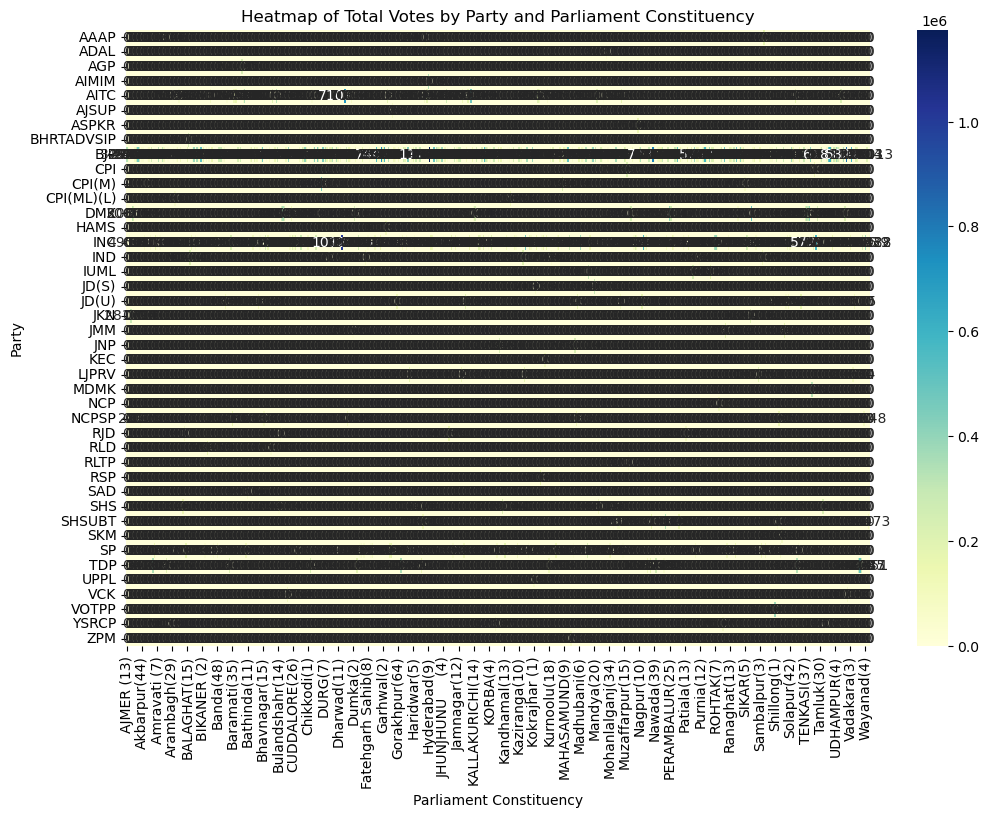

In [42]:
pivot_table = df.pivot_table(values='Margin', index='Party', columns='Parliament Constituency', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Total Votes by Party and Parliament Constituency')
plt.xlabel('Parliament Constituency')
plt.ylabel('Party')
plt.show()

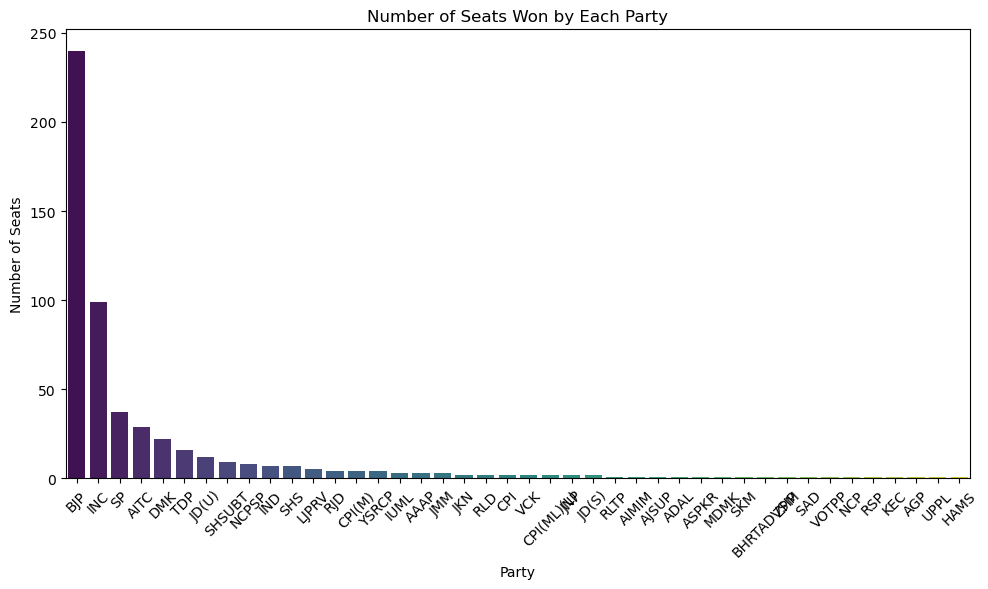

In [52]:
party_counts = df['Party'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=party_counts.index, y=party_counts.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

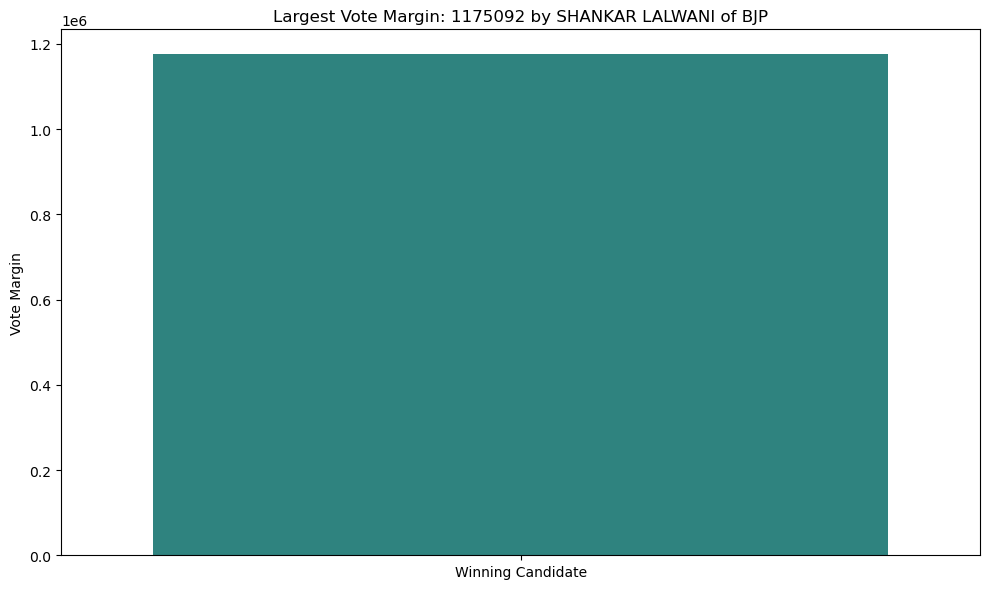

In [62]:
largest_margin = df.loc[df['Margin'].idxmax()]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Winning Candidate'], y=[largest_margin['Margin']], palette='viridis')
plt.title(f'Largest Vote Margin: {largest_margin["Margin"]} by {largest_margin["Winning Candidate"]} of {largest_margin["Party"]}')
plt.ylabel('Vote Margin')
plt.tight_layout()

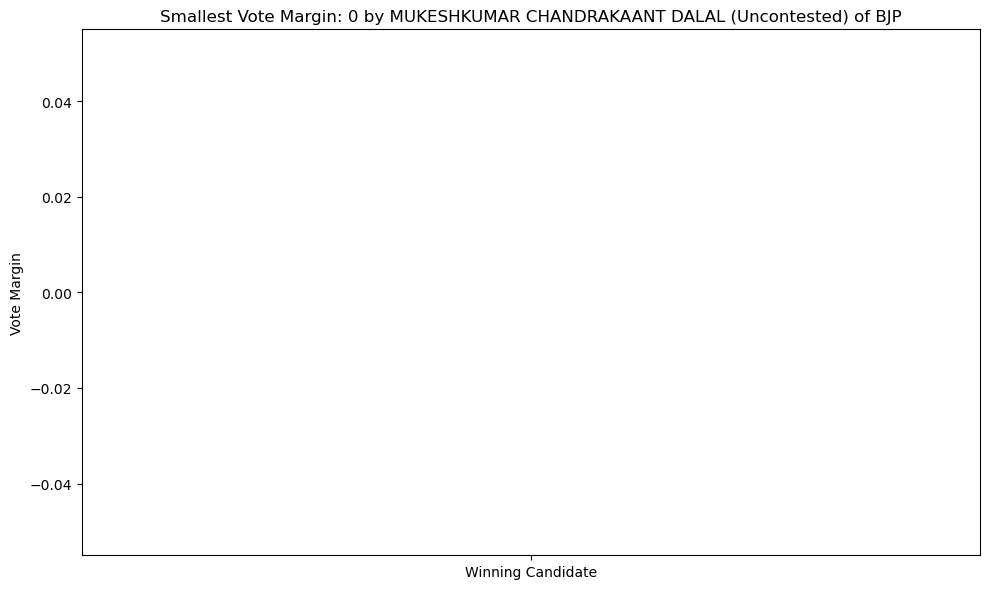

In [63]:
smallest_margin = df.loc[df['Margin'].idxmin()]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Winning Candidate'], y=[smallest_margin['Margin']], palette='viridis')
plt.title(f'Smallest Vote Margin: {smallest_margin["Margin"]} by {smallest_margin["Winning Candidate"]} of {smallest_margin["Party"]}')
plt.ylabel('Vote Margin')
plt.tight_layout()
plt.show()

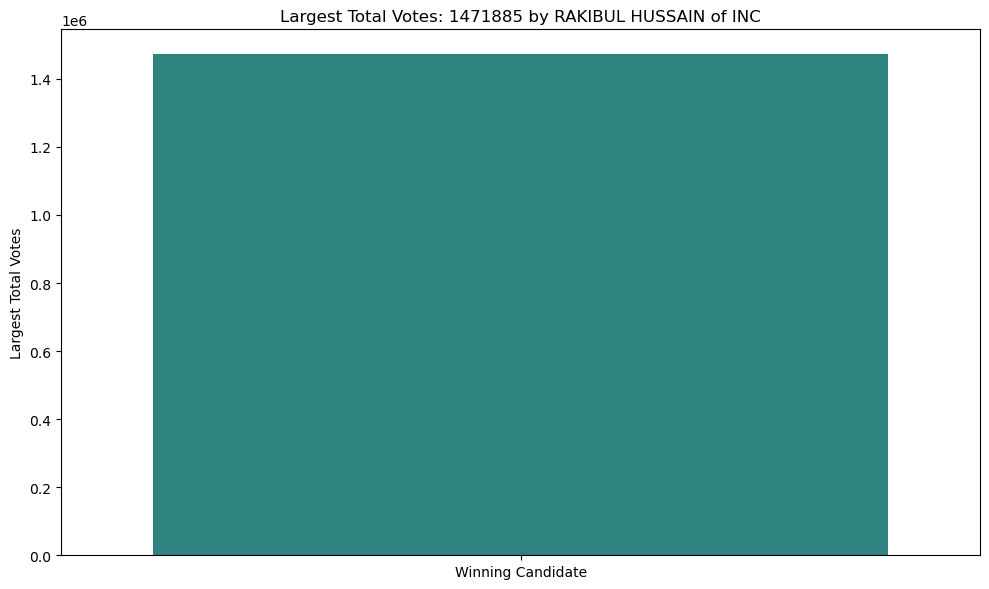

In [61]:
largest_total_votes = df.loc[df['Total Votes'].idxmax()]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Winning Candidate'], y=[largest_total_votes['Total Votes']], palette='viridis')
plt.title(f'Largest Total Votes: {largest_total_votes["Total Votes"]} by {largest_total_votes["Winning Candidate"]} of {largest_total_votes["Party"]}')
plt.ylabel('Largest Total Votes')
plt.tight_layout()

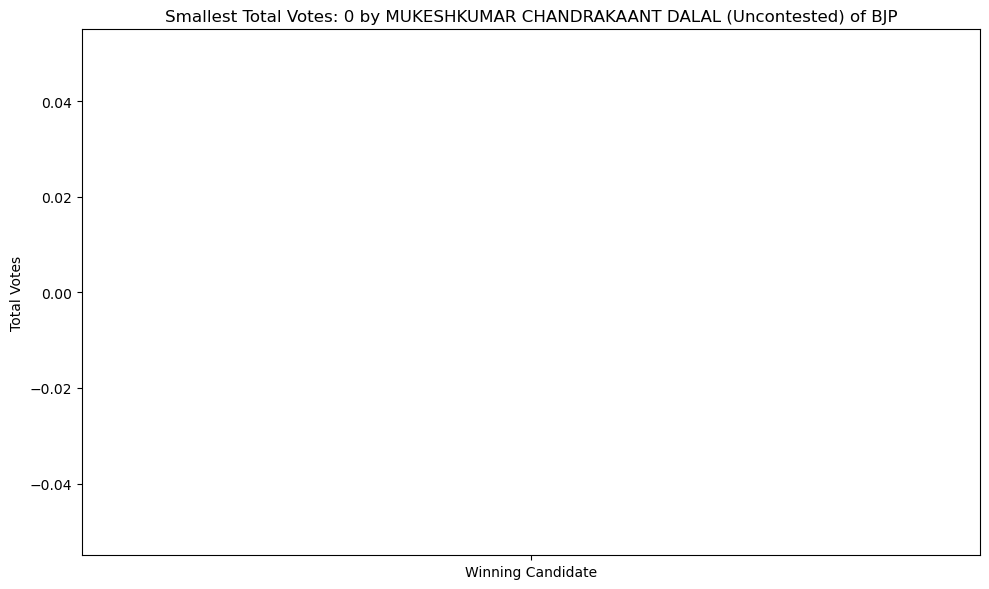

In [64]:
smallest_total_votes = df.loc[df['Total Votes'].idxmin()]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Winning Candidate'], y=[smallest_total_votes['Total Votes']], palette='viridis')
plt.title(f'Smallest Total Votes: {smallest_total_votes["Total Votes"]} by {smallest_total_votes["Winning Candidate"]} of {smallest_total_votes["Party"]}')
plt.ylabel('Total Votes')
plt.tight_layout()
plt.show()

# 10 Key insight from the data
1)BJP won the highest number of seats.
2)HAMS party won least number of seats.
3)BJP got vote share of 48.1%.
4)BJP got highest margin share of 52.4%.
5)Rakibul Hussain of INC got highest Total votes(1471885).
6)Shankar Lalwani of BJP got highest vote margin(1175092).
7)Mukesh Kumar Chandhrakanth Dalal of BJP won anonimously.
8)